In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading the data
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("safety_report.csv")
df.columns = df.columns.str.strip()
df

Saving safety_report.csv to safety_report.csv


,Div.,Text,Primary\ncause,Severity,Risk
0,D1,We have taken shutdown for collector pipe job ...,PC1,4,C1
1,D1,It has repetative observed that Road in front ...,PC2,5,C1
2,D3,"While operating breaker by electrician, his ha...",PC2,5,C2
3,D4,While welding passing and cage changing proces...,PC3,5,C2
4,D2,There was crack found in track of torpedo area...,PC3,4,C2
5,D2,Mr. X was in C shift on dd.mm.yyyy. At around ...,PC1,4,C1
6,D3,While going to rest on a chair its base got ha...,PC1,5,C1
7,D3,"On dd.mm.yyyy at around 7:30 am, Mr. Z (age 52...",PC2,4,C2
8,D1,"A MS Angle, of approximate dimensions 50mm X 5...",PC4,4,C2
9,D4,"Grease was found on floor, due to this one per...",PC3,5,C1


In [3]:
df['Primary\ncause']


0     PC1 
1     PC2 
2     PC2 
3     PC3 
4     PC3 
5     PC1 
6     PC1 
7     PC2 
8     PC4 
9     PC3 
10    PC4 
11    PC1 
12    PC4 
Name: Primary\ncause, dtype: object

In [4]:
#Text Preprocessing
import nltk
nltk.download('stopwords')
#1. Stop Word Removal
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

df['Text_without_stopwords'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Div.,Text,Primary\ncause,Severity,Risk,Text_without_stopwords
0,D1,We have taken shutdown for collector pipe job ...,PC1,4,C1,"We taken shutdown collector pipe job PP Bay, A..."
1,D1,It has repetative observed that Road in front ...,PC2,5,C1,It repetative observed Road front main office ...
2,D3,"While operating breaker by electrician, his ha...",PC2,5,C2,"While operating breaker electrician, hand got ..."
3,D4,While welding passing and cage changing proces...,PC3,5,C2,While welding passing cage changing process st...
4,D2,There was crack found in track of torpedo area...,PC3,4,C2,There crack found track torpedo area. Torpedo ...
5,D2,Mr. X was in C shift on dd.mm.yyyy. At around ...,PC1,4,C1,"Mr. X C shift dd.mm.yyyy. At around 12:30 AM, ..."
6,D3,While going to rest on a chair its base got ha...,PC1,5,C1,While going rest chair base got hanged.
7,D3,"On dd.mm.yyyy at around 7:30 am, Mr. Z (age 52...",PC2,4,C2,"On dd.mm.yyyy around 7:30 am, Mr. Z (age 52 ye..."
8,D1,"A MS Angle, of approximate dimensions 50mm X 5...",PC4,4,C2,"A MS Angle, approximate dimensions 50mm X 50mm..."
9,D4,"Grease was found on floor, due to this one per...",PC3,5,C1,"Grease found floor, due one person narrowly sa..."


In [5]:
#tokenization without stop word
nltk.download('punkt')
from nltk.tokenize import word_tokenize


df["Tokenized text"]=df["Text_without_stopwords"].apply(nltk.word_tokenize)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Div.,Text,Primary\ncause,Severity,Risk,Text_without_stopwords,Tokenized text
0,D1,We have taken shutdown for collector pipe job ...,PC1,4,C1,"We taken shutdown collector pipe job PP Bay, A...","[We, taken, shutdown, collector, pipe, job, PP..."
1,D1,It has repetative observed that Road in front ...,PC2,5,C1,It repetative observed Road front main office ...,"[It, repetative, observed, Road, front, main, ..."
2,D3,"While operating breaker by electrician, his ha...",PC2,5,C2,"While operating breaker electrician, hand got ...","[While, operating, breaker, electrician, ,, ha..."
3,D4,While welding passing and cage changing proces...,PC3,5,C2,While welding passing cage changing process st...,"[While, welding, passing, cage, changing, proc..."
4,D2,There was crack found in track of torpedo area...,PC3,4,C2,There crack found track torpedo area. Torpedo ...,"[There, crack, found, track, torpedo, area, .,..."
5,D2,Mr. X was in C shift on dd.mm.yyyy. At around ...,PC1,4,C1,"Mr. X C shift dd.mm.yyyy. At around 12:30 AM, ...","[Mr., X, C, shift, dd.mm.yyyy, ., At, around, ..."
6,D3,While going to rest on a chair its base got ha...,PC1,5,C1,While going rest chair base got hanged.,"[While, going, rest, chair, base, got, hanged, .]"
7,D3,"On dd.mm.yyyy at around 7:30 am, Mr. Z (age 52...",PC2,4,C2,"On dd.mm.yyyy around 7:30 am, Mr. Z (age 52 ye...","[On, dd.mm.yyyy, around, 7:30, am, ,, Mr., Z, ..."
8,D1,"A MS Angle, of approximate dimensions 50mm X 5...",PC4,4,C2,"A MS Angle, approximate dimensions 50mm X 50mm...","[A, MS, Angle, ,, approximate, dimensions, 50m..."
9,D4,"Grease was found on floor, due to this one per...",PC3,5,C1,"Grease found floor, due one person narrowly sa...","[Grease, found, floor, ,, due, one, person, na..."


In [6]:
#2.POS tagging
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag,pos_tag_sents
df["Pos_tags"]=pos_tag_sents(df["Tokenized text"])
df

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Div.,Text,Primary\ncause,Severity,Risk,Text_without_stopwords,Tokenized text,Pos_tags
0,D1,We have taken shutdown for collector pipe job ...,PC1,4,C1,"We taken shutdown collector pipe job PP Bay, A...","[We, taken, shutdown, collector, pipe, job, PP...","[(We, PRP), (taken, VBN), (shutdown, JJ), (col..."
1,D1,It has repetative observed that Road in front ...,PC2,5,C1,It repetative observed Road front main office ...,"[It, repetative, observed, Road, front, main, ...","[(It, PRP), (repetative, VBP), (observed, JJ),..."
2,D3,"While operating breaker by electrician, his ha...",PC2,5,C2,"While operating breaker electrician, hand got ...","[While, operating, breaker, electrician, ,, ha...","[(While, IN), (operating, VBG), (breaker, NN),..."
3,D4,While welding passing and cage changing proces...,PC3,5,C2,While welding passing cage changing process st...,"[While, welding, passing, cage, changing, proc...","[(While, IN), (welding, VBG), (passing, VBG), ..."
4,D2,There was crack found in track of torpedo area...,PC3,4,C2,There crack found track torpedo area. Torpedo ...,"[There, crack, found, track, torpedo, area, .,...","[(There, EX), (crack, NN), (found, VBD), (trac..."
5,D2,Mr. X was in C shift on dd.mm.yyyy. At around ...,PC1,4,C1,"Mr. X C shift dd.mm.yyyy. At around 12:30 AM, ...","[Mr., X, C, shift, dd.mm.yyyy, ., At, around, ...","[(Mr., NNP), (X, NNP), (C, NNP), (shift, NN), ..."
6,D3,While going to rest on a chair its base got ha...,PC1,5,C1,While going rest chair base got hanged.,"[While, going, rest, chair, base, got, hanged, .]","[(While, IN), (going, VBG), (rest, JJ), (chair..."
7,D3,"On dd.mm.yyyy at around 7:30 am, Mr. Z (age 52...",PC2,4,C2,"On dd.mm.yyyy around 7:30 am, Mr. Z (age 52 ye...","[On, dd.mm.yyyy, around, 7:30, am, ,, Mr., Z, ...","[(On, IN), (dd.mm.yyyy, NN), (around, IN), (7:..."
8,D1,"A MS Angle, of approximate dimensions 50mm X 5...",PC4,4,C2,"A MS Angle, approximate dimensions 50mm X 50mm...","[A, MS, Angle, ,, approximate, dimensions, 50m...","[(A, DT), (MS, NNP), (Angle, NNP), (,, ,), (ap..."
9,D4,"Grease was found on floor, due to this one per...",PC3,5,C1,"Grease found floor, due one person narrowly sa...","[Grease, found, floor, ,, due, one, person, na...","[(Grease, NNP), (found, VBD), (floor, NN), (,,..."


In [7]:
#3. Lemmatization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df['stemmed_text'] = df['Tokenized text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df

,Div.,Text,Primary\ncause,Severity,Risk,Text_without_stopwords,Tokenized text,Pos_tags,stemmed_text
0,D1,We have taken shutdown for collector pipe job ...,PC1,4,C1,"We taken shutdown collector pipe job PP Bay, A...","[We, taken, shutdown, collector, pipe, job, PP...","[(We, PRP), (taken, VBN), (shutdown, JJ), (col...","[we, taken, shutdown, collector, pipe, job, pp..."
1,D1,It has repetative observed that Road in front ...,PC2,5,C1,It repetative observed Road front main office ...,"[It, repetative, observed, Road, front, main, ...","[(It, PRP), (repetative, VBP), (observed, JJ),...","[it, repet, observ, road, front, main, offic, ..."
2,D3,"While operating breaker by electrician, his ha...",PC2,5,C2,"While operating breaker electrician, hand got ...","[While, operating, breaker, electrician, ,, ha...","[(While, IN), (operating, VBG), (breaker, NN),...","[while, oper, breaker, electrician, ,, hand, g..."
3,D4,While welding passing and cage changing proces...,PC3,5,C2,While welding passing cage changing process st...,"[While, welding, passing, cage, changing, proc...","[(While, IN), (welding, VBG), (passing, VBG), ...","[while, weld, pass, cage, chang, process, stop..."
4,D2,There was crack found in track of torpedo area...,PC3,4,C2,There crack found track torpedo area. Torpedo ...,"[There, crack, found, track, torpedo, area, .,...","[(There, EX), (crack, NN), (found, VBD), (trac...","[there, crack, found, track, torpedo, area, .,..."
5,D2,Mr. X was in C shift on dd.mm.yyyy. At around ...,PC1,4,C1,"Mr. X C shift dd.mm.yyyy. At around 12:30 AM, ...","[Mr., X, C, shift, dd.mm.yyyy, ., At, around, ...","[(Mr., NNP), (X, NNP), (C, NNP), (shift, NN), ...","[mr., x, c, shift, dd.mm.yyyy, ., at, around, ..."
6,D3,While going to rest on a chair its base got ha...,PC1,5,C1,While going rest chair base got hanged.,"[While, going, rest, chair, base, got, hanged, .]","[(While, IN), (going, VBG), (rest, JJ), (chair...","[while, go, rest, chair, base, got, hang, .]"
7,D3,"On dd.mm.yyyy at around 7:30 am, Mr. Z (age 52...",PC2,4,C2,"On dd.mm.yyyy around 7:30 am, Mr. Z (age 52 ye...","[On, dd.mm.yyyy, around, 7:30, am, ,, Mr., Z, ...","[(On, IN), (dd.mm.yyyy, NN), (around, IN), (7:...","[on, dd.mm.yyyy, around, 7:30, am, ,, mr., z, ..."
8,D1,"A MS Angle, of approximate dimensions 50mm X 5...",PC4,4,C2,"A MS Angle, approximate dimensions 50mm X 50mm...","[A, MS, Angle, ,, approximate, dimensions, 50m...","[(A, DT), (MS, NNP), (Angle, NNP), (,, ,), (ap...","[a, ms, angl, ,, approxim, dimens, 50mm, x, 50..."
9,D4,"Grease was found on floor, due to this one per...",PC3,5,C1,"Grease found floor, due one person narrowly sa...","[Grease, found, floor, ,, due, one, person, na...","[(Grease, NNP), (found, VBD), (floor, NN), (,,...","[greas, found, floor, ,, due, one, person, nar..."


In [8]:
#4. Stemming
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


wnl = WordNetLemmatizer()


df['lemmatize_text'] = df['Tokenized text'].apply(lambda x: [wnl.lemmatize(y) for y in x]) # Stem every word.
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Div.,Text,Primary\ncause,Severity,Risk,Text_without_stopwords,Tokenized text,Pos_tags,stemmed_text,lemmatize_text
0,D1,We have taken shutdown for collector pipe job ...,PC1,4,C1,"We taken shutdown collector pipe job PP Bay, A...","[We, taken, shutdown, collector, pipe, job, PP...","[(We, PRP), (taken, VBN), (shutdown, JJ), (col...","[we, taken, shutdown, collector, pipe, job, pp...","[We, taken, shutdown, collector, pipe, job, PP..."
1,D1,It has repetative observed that Road in front ...,PC2,5,C1,It repetative observed Road front main office ...,"[It, repetative, observed, Road, front, main, ...","[(It, PRP), (repetative, VBP), (observed, JJ),...","[it, repet, observ, road, front, main, offic, ...","[It, repetative, observed, Road, front, main, ..."
2,D3,"While operating breaker by electrician, his ha...",PC2,5,C2,"While operating breaker electrician, hand got ...","[While, operating, breaker, electrician, ,, ha...","[(While, IN), (operating, VBG), (breaker, NN),...","[while, oper, breaker, electrician, ,, hand, g...","[While, operating, breaker, electrician, ,, ha..."
3,D4,While welding passing and cage changing proces...,PC3,5,C2,While welding passing cage changing process st...,"[While, welding, passing, cage, changing, proc...","[(While, IN), (welding, VBG), (passing, VBG), ...","[while, weld, pass, cage, chang, process, stop...","[While, welding, passing, cage, changing, proc..."
4,D2,There was crack found in track of torpedo area...,PC3,4,C2,There crack found track torpedo area. Torpedo ...,"[There, crack, found, track, torpedo, area, .,...","[(There, EX), (crack, NN), (found, VBD), (trac...","[there, crack, found, track, torpedo, area, .,...","[There, crack, found, track, torpedo, area, .,..."
5,D2,Mr. X was in C shift on dd.mm.yyyy. At around ...,PC1,4,C1,"Mr. X C shift dd.mm.yyyy. At around 12:30 AM, ...","[Mr., X, C, shift, dd.mm.yyyy, ., At, around, ...","[(Mr., NNP), (X, NNP), (C, NNP), (shift, NN), ...","[mr., x, c, shift, dd.mm.yyyy, ., at, around, ...","[Mr., X, C, shift, dd.mm.yyyy, ., At, around, ..."
6,D3,While going to rest on a chair its base got ha...,PC1,5,C1,While going rest chair base got hanged.,"[While, going, rest, chair, base, got, hanged, .]","[(While, IN), (going, VBG), (rest, JJ), (chair...","[while, go, rest, chair, base, got, hang, .]","[While, going, rest, chair, base, got, hanged, .]"
7,D3,"On dd.mm.yyyy at around 7:30 am, Mr. Z (age 52...",PC2,4,C2,"On dd.mm.yyyy around 7:30 am, Mr. Z (age 52 ye...","[On, dd.mm.yyyy, around, 7:30, am, ,, Mr., Z, ...","[(On, IN), (dd.mm.yyyy, NN), (around, IN), (7:...","[on, dd.mm.yyyy, around, 7:30, am, ,, mr., z, ...","[On, dd.mm.yyyy, around, 7:30, am, ,, Mr., Z, ..."
8,D1,"A MS Angle, of approximate dimensions 50mm X 5...",PC4,4,C2,"A MS Angle, approximate dimensions 50mm X 50mm...","[A, MS, Angle, ,, approximate, dimensions, 50m...","[(A, DT), (MS, NNP), (Angle, NNP), (,, ,), (ap...","[a, ms, angl, ,, approxim, dimens, 50mm, x, 50...","[A, MS, Angle, ,, approximate, dimension, 50mm..."
9,D4,"Grease was found on floor, due to this one per...",PC3,5,C1,"Grease found floor, due one person narrowly sa...","[Grease, found, floor, ,, due, one, person, na...","[(Grease, NNP), (found, VBD), (floor, NN), (,,...","[greas, found, floor, ,, due, one, person, nar...","[Grease, found, floor, ,, due, one, person, na..."


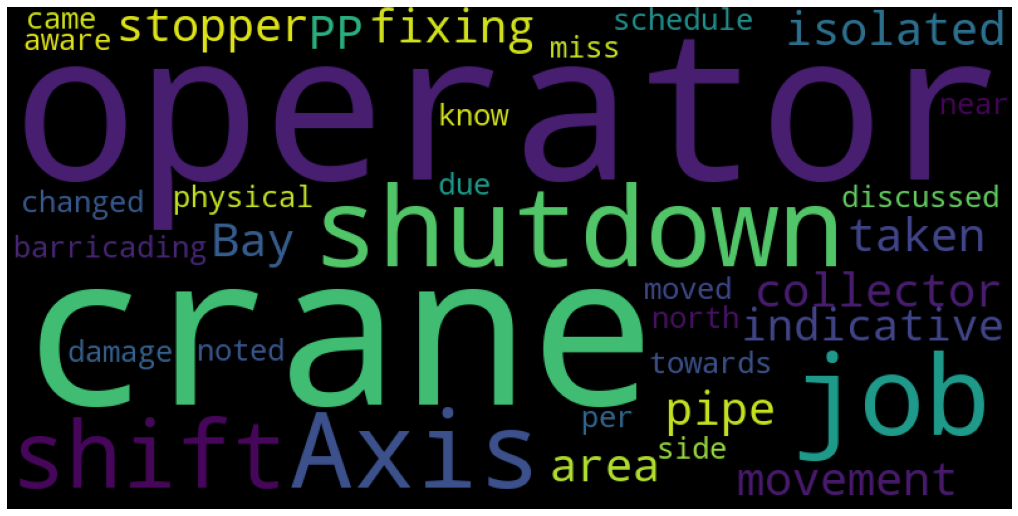

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text = df['Text_without_stopwords'][0]

def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(
                          width=800, height=400,
                          relative_scaling = 1.0,

                          ).generate(text)
    
    fig = plt.figure(1, figsize=(18, 14))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")
    ## Pick One:
    # plt.show()
    plt.savefig("WordCloud.png")

generate_wordcloud(text)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform(df['Tokenized text']).toarray()
Xp = vectorizer.fit_transform(df['Tokenized text'])
X
print("Shape: ",X.shape)
print(X)


Shape:  (13, 253)
[[0.11692718 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.11483506 0.         0.         ... 0.         0.         0.        ]]


In [11]:
#Preparing a new dataset containing the vector space model and four attributes present in the table
import numpy as np
#Xp=X.todense()
D= df['Div.']
P= df['Primary\ncause']
S= df['Severity']
R= df['Risk']
Xfr= pd.DataFrame(Xp)
Dfr= pd.DataFrame(D)
Pfr= pd.DataFrame(P)
Sfr= pd.DataFrame(S)
Rfr= pd.DataFrame(R)
Xfr= np.append(Xfr, Dfr, axis =1)
Xfr= np.append(Xfr, Pfr, axis =1)
Xfr= np.append(Xfr, Sfr, axis =1)
Xfr= np.append(Xfr, Rfr, axis =1)
print("Shape: ",Xfr.shape)
print(Xfr)
Xnew = pd.DataFrame(data = Xfr, 
                        index = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"], 
                        columns = ["Word",
                                   "Division", "Primary_Cause", "Severity", "Risk"])
  
# printing the dataframe
Xnew



Shape:  (13, 5)
[[<1x253 sparse matrix of type '<class 'numpy.float64'>'
	with 49 stored elements in Compressed Sparse Row format>
  'D1' 'PC1 ' 4 'C1']
 [<1x253 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>
  'D1' 'PC2 ' 5 'C1']
 [<1x253 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>
  'D3 ' 'PC2 ' 5 'C2']
 [<1x253 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>
  'D4' 'PC3 ' 5 'C2']
 [<1x253 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>
  'D2 ' 'PC3 ' 4 'C2']
 [<1x253 sparse matrix of type '<class 'numpy.float64'>'
	with 60 stored elements in Compressed Sparse Row format>
  'D2' 'PC1 ' 4 'C1']
 [<1x253 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>
  'D3 ' 'PC1 ' 5 'C1']
 [<1x253 sparse matrix 

,Word,Division,Primary_Cause,Severity,Risk
0,"(0, 168)\t0.11692717811227572\n (0, 172)\t0...",D1,PC1,4,C1
1,"(0, 211)\t0.24825582552066805\n (0, 200)\t0...",D1,PC2,5,C1
2,"(0, 151)\t0.21473888816018327\n (0, 233)\t0...",D3,PC2,5,C2
3,"(0, 120)\t0.19446874960860108\n (0, 128)\t0...",D4,PC3,5,C2
4,"(0, 155)\t0.27300518050598144\n (0, 221)\t0...",D2,PC3,4,C2
5,"(0, 138)\t0.103197536836919\n (0, 65)\t0.10...",D2,PC1,4,C1
6,"(0, 145)\t0.40119122947516334\n (0, 87)\t0....",D3,PC1,5,C1
7,"(0, 126)\t0.15076836628406182\n (0, 92)\t0....",D3,PC2,4,C2
8,"(0, 216)\t0.1473648493500198\n (0, 207)\t0....",D1,PC4,4,C2
9,"(0, 129)\t0.31237137762612316\n (0, 212)\t0...",D4,PC3,5,C1


In [12]:
from sklearn.model_selection import train_test_split


ys=df['Risk']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, ys, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)






In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[0 2]
 [0 2]]
              precision    recall  f1-score   support

          C1       0.00      0.00      0.00         2
          C2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
